# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [4]:
library('tidyverse')

In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [5]:
vaccines_df = read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2020/2020-02-25/measles.csv',
    col_types = cols()
)
vaccines_df |> head()

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [17]:
# create the df_vacc_rates here

df_vacc_rates = vaccines_df |>
    filter(mmr >= 0) |>
    group_by(state) |>
    summarize(proportion_above_95 = sum(mmr > 95, na.rm = TRUE) / n(),
              fraction_above_95 = paste0(sum(mmr > 95, na.rm = TRUE), "/", n())
              )
df_vacc_rates

state,proportion_above_95,fraction_above_95
<chr>,<dbl>,<chr>
Arizona,0.496157131,581/1171
Arkansas,0.003527337,2/567
California,0.730966608,10398/14225
Colorado,0.621101526,936/1507
Connecticut,0.806451613,475/589
Illinois,0.896304970,6889/7686
Maine,0.459383754,164/357
Massachusetts,0.816561845,779/954
Minnesota,0.467671061,745/1593


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [21]:
min_fraction = min(df_vacc_rates$proportion_above_95, na.rm = TRUE)
df_vacc_rates_min = df_vacc_rates |>
  filter(proportion_above_95 == min_fraction) |>
  select(state, fraction_above_95)
df_vacc_rates_min


state,fraction_above_95
<chr>,<chr>
Arkansas,2/567


**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `mutate`, and `cume_dist`.

Warning message in geom_text(aes(x = 70, y = 0.75, label = "CDC recommended\nvaccination rate\n(95%)"), :
“All aesthetics have length 1, but the data has 2085 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


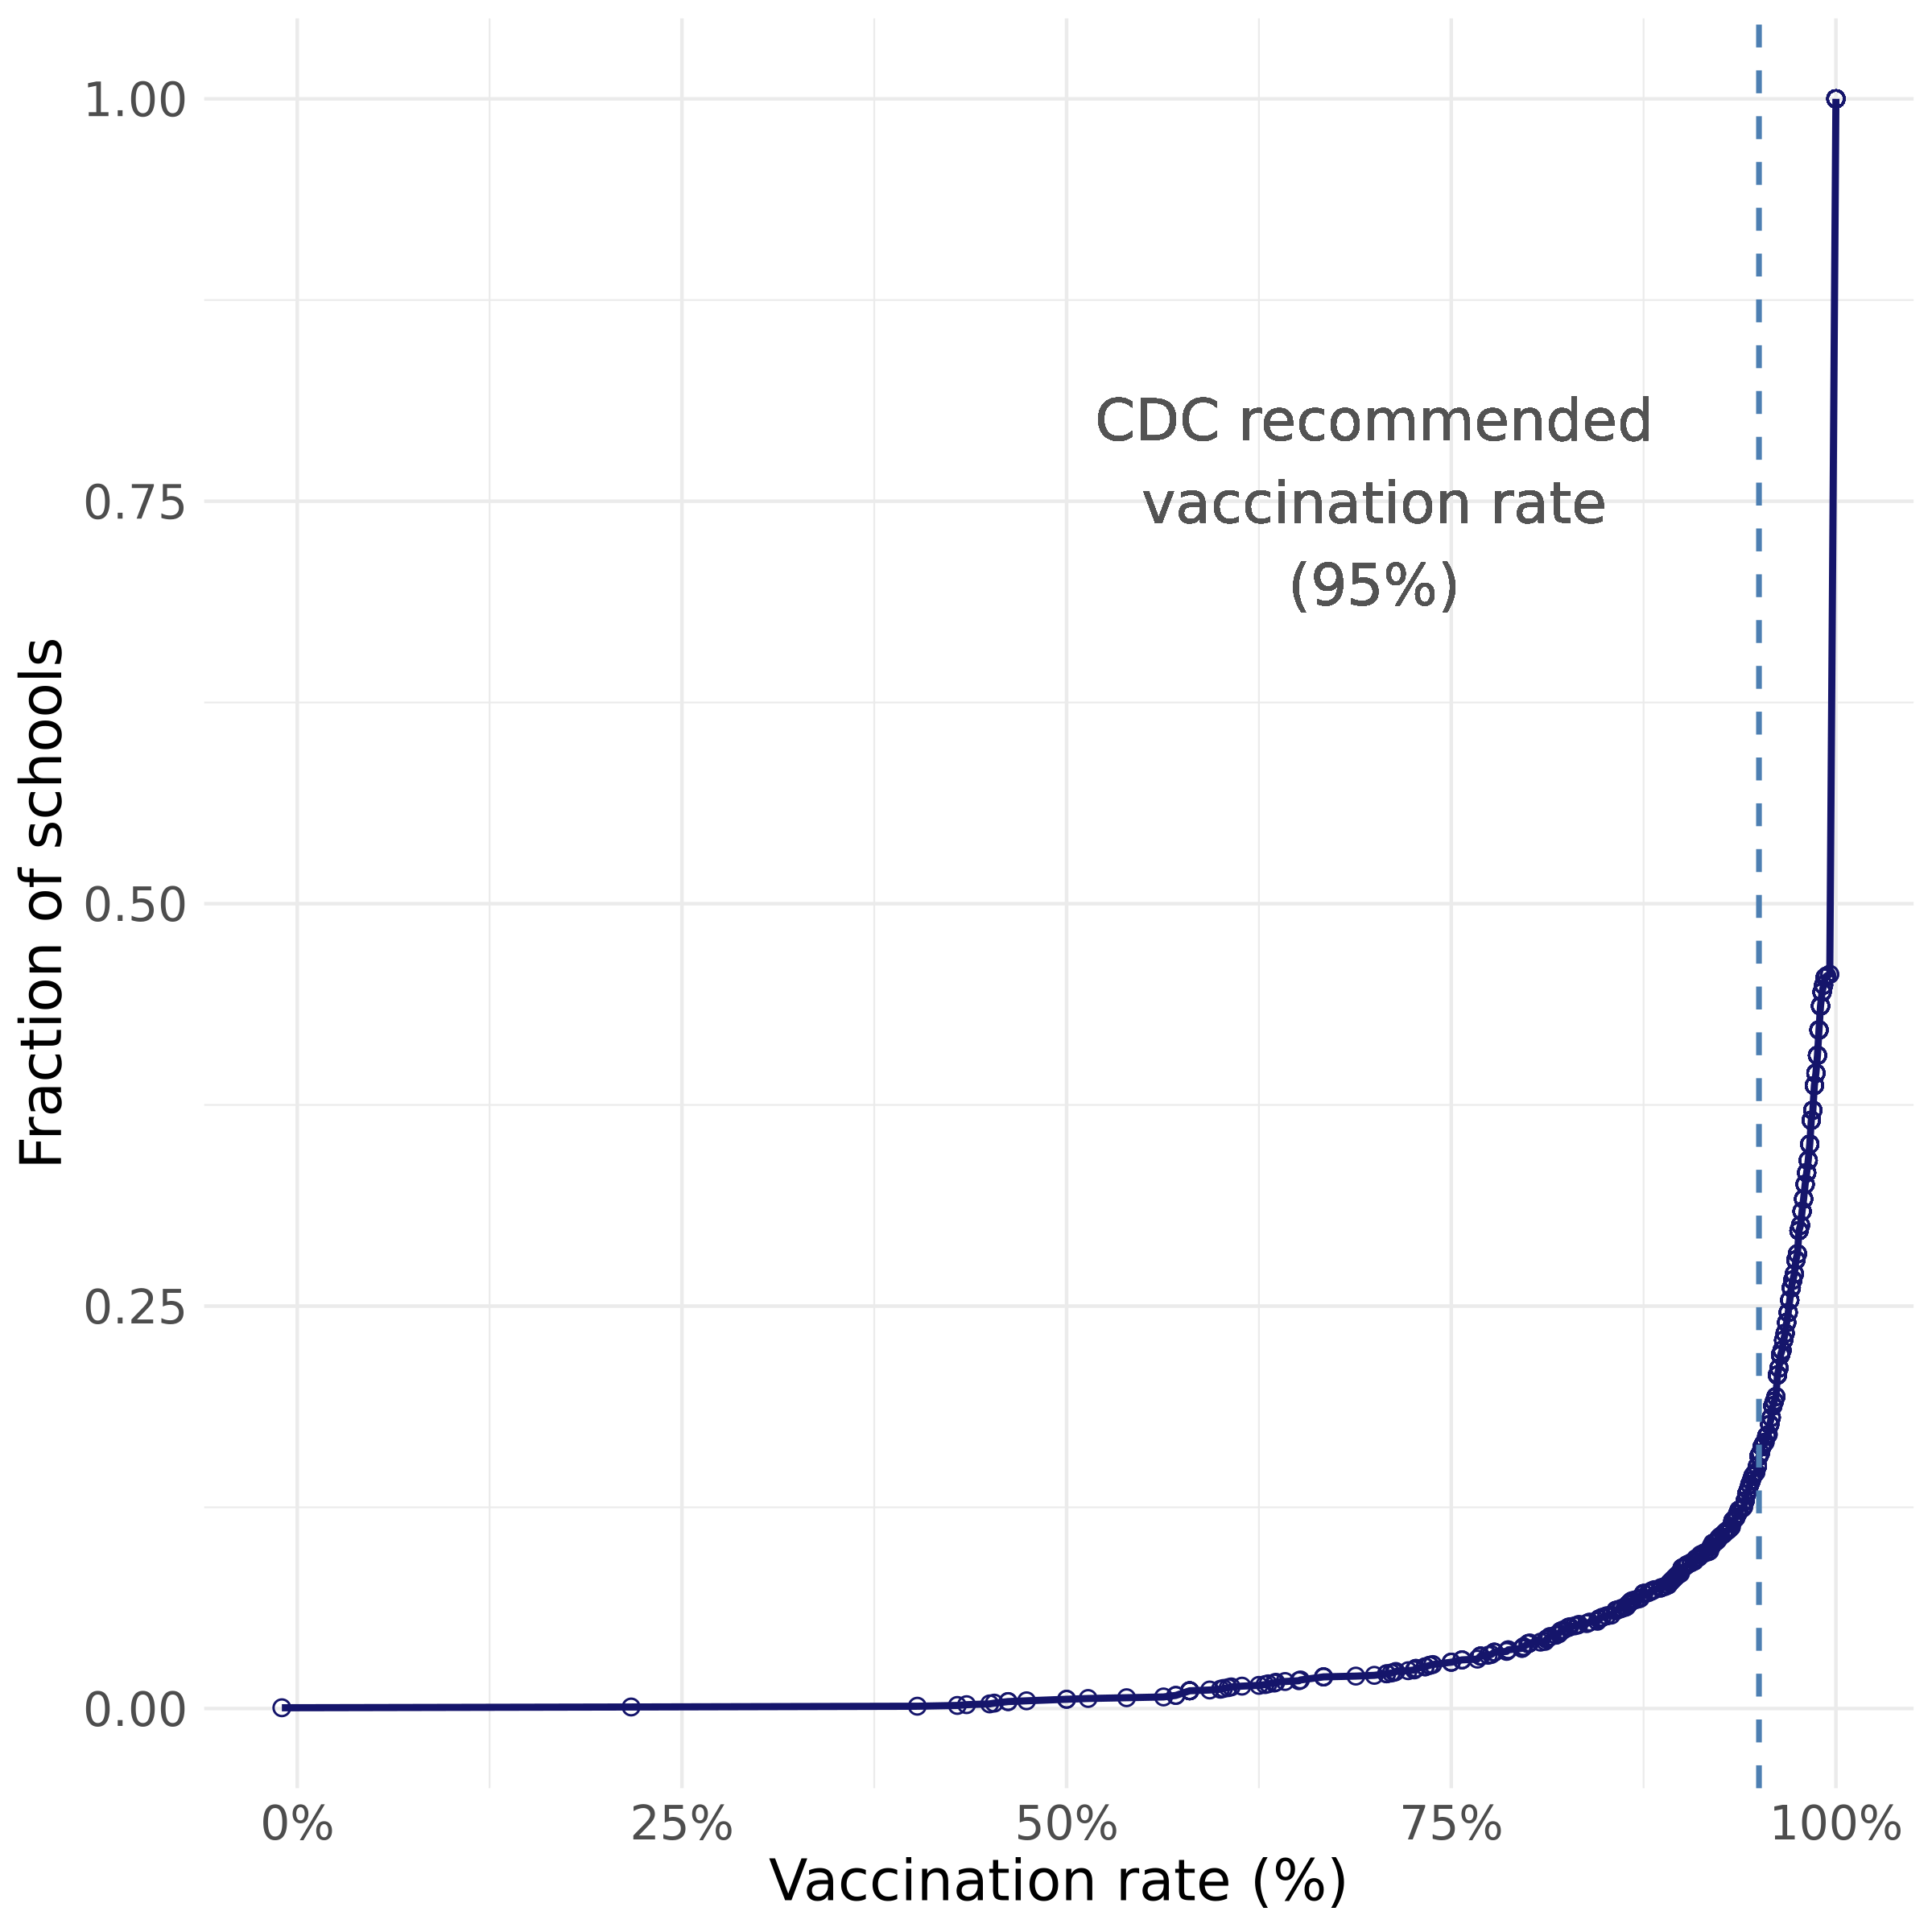

In [27]:
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res = 300)

nc_schools = vaccines_df |>
  filter(state == "North Carolina") |>
  arrange(overall) |>
  mutate(ecdf = cume_dist(overall)) |>
  select(name,overall,ecdf)

ggplot(nc_schools, aes(x = overall, y = ecdf)) +
    geom_line(color = "#15156b", size = 1) +
    geom_point(color = "#15156b", size = 2, shape = 1) +
    geom_vline(xintercept = 95, linetype = "dashed", color = "#4d7fb2", size = 0.8) +
    geom_text(
    aes(x = 70, y = 0.75, label = "CDC recommended\nvaccination rate\n(95%)"),
    color = "#535353",
    size = 6
    ) +
    scale_x_continuous(labels = scales::percent_format(scale = 1)) +
    labs(
        x = "Vaccination rate (%)",
        y = "Fraction of schools",
    ) +
    theme_minimal() +
    theme(
        axis.text = element_text(size = 14),
        axis.title = element_text(size = 17)
    )

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it. I used `geom_text_repel` from [ggrepel](https://cran.r-project.org/web/packages/ggrepel/vignettes/ggrepel.html) fo the annotation.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/2023/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [90]:
nc_schools |>
    summarize(median_vacc_nc = median(overall))

# Yes, the median vaccination rate for NC schools is above the CDC recommended target based on the output below.

median_vacc_nc
<dbl>
100
